# 2019 Review of Contracts

This notebook contains a summary report of the contracts initiated during 2019 and their financial impact, trends and our interpretation of what this means for 2020. 

In [1]:
import pandas as pd
import data_work
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
df = data_work.load_data()
df = data_work.clean_values(df)

summary = data_work.summary_calculations(df)

df_detail = data_work.detail_calculations(df)

df_time = df_detail.reset_index()
df_time['year'] = df_time['due_date'].dt.year
df_time['month'] = df_time['due_date'].dt.month

## 2019 Deposits and Monthly Revenue
In review of the 2019 deposits and fee revenue, we can see little seasonality in our ability to acquire new contracts and confirm with deposits. This interestingly impacts our fee revenue fairly consistently with growth over time at a steady pace as we generate new work to bill.

There may be an impact in seasonality to our contract term lengths which generates this steady increase, so we investegated that next.

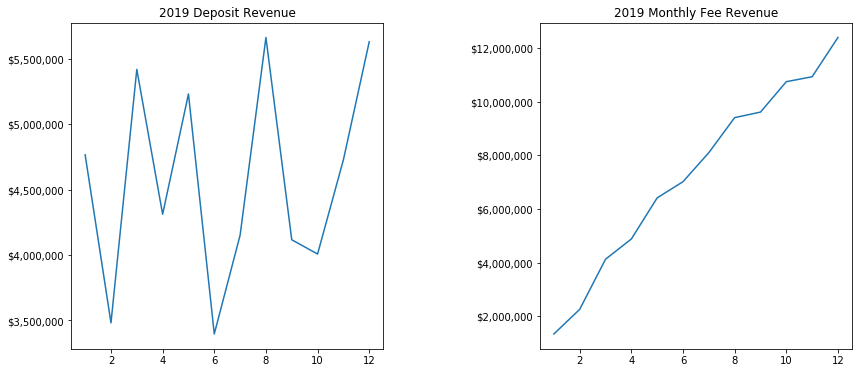

In [3]:
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

plot_deposits = df_time.loc[(df_time['year'] == 2019) & (df_time['deposit'] == True)]
plot_monthly = df_time.loc[(df_time['year'] == 2019) & (df_time['deposit'] == False)]

plot_deposits = plot_deposits.groupby('month').agg({'amt_due':sum})
plot_monthly = plot_monthly.groupby('month').agg({'amt_due':sum})
                     
fig, axs = plt.subplots(1, 2, figsize=(14,6))
axs[0].set_title("2019 Deposit Revenue")
axs[0].plot(plot_deposits)
axs[0].yaxis.set_major_formatter(tick)

axs[1].set_title("2019 Monthly Fee Revenue")
axs[1].plot(plot_monthly)
axs[1].yaxis.set_major_formatter(tick)

plt.subplots_adjust(wspace = .5)

## 2019 Contract Length by Month
In review of our distribution of contract terms, they do vary thoughout the year but does not appear to be any correlation to time. 

Next we will want to review our contracts by segment to see where we are having success and where we are having challenges.

In [ ]:
summary['year'] = summary['contract_start'].dt.year
summary['month'] = summary['contract_start'].dt.month

plot_terms = summary.loc[summary['year'] == 2019]

plot_terms.loc[plot_terms['contract_term'].between(1,3), '1 to 3'] = 1
plot_terms.loc[plot_terms['contract_term'].between(4,6), '4 to 6'] = 1
plot_terms.loc[plot_terms['contract_term'].between(7,12), '7 to 12'] = 1
plot_terms.loc[plot_terms['contract_term'].between(12,18), '13 to 18'] = 1
plot_terms.loc[plot_terms['contract_term'].between(19,24), '19 to 24'] = 1

plot_terms = plot_terms.groupby('month').agg({'1 to 3':sum, '4 to 6':sum, '7 to 12':sum, 
                                              '13 to 18':sum, '19 to 24':sum})

ax = plot_terms.plot.area(figsize=(14,6)).set_title("2019 Distribution of Contract Lengths by Month")
ax = plot_terms.plot.bar(figsize=(14,6)).set_title("2019 Distribution of Contract Lengths by Month")